#### Setup

In [1]:
from google.colab import drive
import sys

In [3]:
drive.mount('/content/drive')
sys.path.append('/content/drive/Shareddrives/CMPE260/')

Mounted at /content/drive


In [10]:
%run /content/drive/Shareddrives/CMPE260/code/rec_implementation.ipynb

cpu


#### Training

In [5]:
ou_noise = OUStrategy(params['embedding_dim'])

In [6]:
train_env = Environment(train_matrix)

hits, dcgs = [], []
hits_all, dcgs_all = [], []
step, best_step = 0, 0
step, best_step, best_step_all = 0, 0, 0

users = np.random.permutation(apt_users)

In [7]:
for u in tqdm.tqdm(users):
    print('user =', u)
    user, memory = train_env.reset(u)

    for t in range(int(train_matrix[u].sum())):
      try:
        # given current state, get action using actor network
        action_emb = policy_network(state_representation(user, memory))
        action_emb = ou_noise.get_action(action_emb[0], t)
        action = policy_network.get_action(user, torch.tensor(train_env.memory[user.detach().cpu().numpy().astype(int), :]), state_representation, action_emb,
            torch.tensor([item for item in train_env.available_books if item not in train_env.viewed_books]).long()
        )
      except Exception as e:
        print(e)

      # update replay buffer
      user, memory, reward, done = train_env.step(action, action_emb, replay_buffer)

      # update weights of action and critic network
      if len(replay_buffer) > params['batch_size']:
          update(params['batch_size'], params['gamma'], params['min_value'], params['max_value'], params['soft_tau'])

      # monitor training process by evaluating on only one user for efficiency
      if step % 100 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, test_loader)

          hits.append(hit)
          dcgs.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits[best_step], dcgs[best_step]])) >= 0:
              best_step = step // 100
              torch.save(policy_network.state_dict(), params['log_w_ou_dir'] + 'policy_net.pth')
              torch.save(value_network.state_dict(), params['log_w_ou_dir'] + 'value_net.pth')
              torch.save(state_representation.state_dict(), params['log_w_ou_dir'] + 'state_repr.pth')

      # evaluate for best policy after every 1000 steps on the whole test set
      if step % 1000 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, full_loader)

          hits_all.append(hit)
          dcgs_all.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits_all[best_step_all], dcgs_all[best_step_all]])) >= 0:
              best_step_all = step // 1000
              torch.save(policy_network.state_dict(), params['log_w_ou_dir'] + 'best_policy_net.pth')
              torch.save(value_network.state_dict(), params['log_w_ou_dir'] + 'best_value_net.pth')
              torch.save(state_representation.state_dict(), params['log_w_ou_dir'] + 'best_state_repr.pth')

      step += 1

  0%|          | 0/52 [00:00<?, ?it/s]

user = 172


  2%|▏         | 1/52 [00:13<11:12, 13.19s/it]

user = 243


  4%|▍         | 2/52 [00:19<07:50,  9.41s/it]

user = 43


  6%|▌         | 3/52 [00:30<08:07,  9.95s/it]

user = 83


  8%|▊         | 4/52 [00:38<07:26,  9.29s/it]

user = 141


 10%|▉         | 5/52 [00:46<06:54,  8.81s/it]

user = 124


 12%|█▏        | 6/52 [00:55<06:49,  8.90s/it]

user = 22


 13%|█▎        | 7/52 [05:20<1:09:26, 92.60s/it]

user = 125


 15%|█▌        | 8/52 [05:29<48:15, 65.81s/it]  

user = 14


 17%|█▋        | 9/52 [05:35<33:43, 47.05s/it]

user = 162


 19%|█▉        | 10/52 [05:43<24:36, 35.15s/it]

user = 27


 21%|██        | 11/52 [05:50<18:08, 26.55s/it]

user = 134


 23%|██▎       | 12/52 [06:01<14:28, 21.72s/it]

user = 12


 25%|██▌       | 13/52 [10:44<1:05:36, 100.94s/it]

user = 93


 27%|██▋       | 14/52 [10:55<46:38, 73.65s/it]   

user = 136


 29%|██▉       | 15/52 [11:06<33:45, 54.75s/it]

user = 67


 31%|███       | 16/52 [11:14<24:27, 40.75s/it]

user = 137


 33%|███▎      | 17/52 [11:26<18:43, 32.11s/it]

user = 52


 35%|███▍      | 18/52 [11:34<14:06, 24.91s/it]

user = 211


 37%|███▋      | 19/52 [11:44<11:17, 20.52s/it]

user = 205


 38%|███▊      | 20/52 [16:50<56:35, 106.11s/it]

user = 184


 40%|████      | 21/52 [17:01<40:06, 77.61s/it] 

user = 222


 42%|████▏     | 22/52 [17:09<28:25, 56.86s/it]

user = 75


 44%|████▍     | 23/52 [17:16<20:09, 41.72s/it]

user = 32


 46%|████▌     | 24/52 [17:23<14:34, 31.22s/it]

user = 70


 48%|████▊     | 25/52 [17:31<10:55, 24.29s/it]

user = 143


 50%|█████     | 26/52 [22:42<47:51, 110.43s/it]

user = 198


 52%|█████▏    | 27/52 [22:50<33:08, 79.53s/it] 

user = 25


 54%|█████▍    | 28/52 [23:02<23:43, 59.30s/it]

user = 63


 56%|█████▌    | 29/52 [23:07<16:33, 43.21s/it]

user = 203


 58%|█████▊    | 30/52 [23:18<12:16, 33.49s/it]

user = 199


 60%|█████▉    | 31/52 [23:24<08:51, 25.32s/it]

user = 54


 62%|██████▏   | 32/52 [23:34<06:52, 20.61s/it]

user = 1


 63%|██████▎   | 33/52 [28:50<34:34, 109.21s/it]

user = 238


 65%|██████▌   | 34/52 [28:56<23:29, 78.31s/it] 

user = 82


 67%|██████▋   | 35/52 [29:08<16:31, 58.35s/it]

user = 11


 69%|██████▉   | 36/52 [29:14<11:24, 42.75s/it]

user = 38


 71%|███████   | 37/52 [29:24<08:11, 32.80s/it]

user = 226


 73%|███████▎  | 38/52 [29:32<05:54, 25.32s/it]

user = 78


 75%|███████▌  | 39/52 [34:37<23:42, 109.42s/it]

user = 36


 77%|███████▋  | 40/52 [34:47<15:52, 79.40s/it] 

user = 105


 79%|███████▉  | 41/52 [34:57<10:46, 58.78s/it]

user = 21


 81%|████████  | 42/52 [35:04<07:10, 43.05s/it]

user = 144


 83%|████████▎ | 43/52 [35:13<04:56, 32.97s/it]

user = 242


 85%|████████▍ | 44/52 [35:23<03:28, 26.07s/it]

user = 213


 87%|████████▋ | 45/52 [35:33<02:27, 21.13s/it]

user = 132


 88%|████████▊ | 46/52 [40:13<09:53, 98.84s/it]

user = 212


 90%|█████████ | 47/52 [40:21<05:58, 71.61s/it]

user = 5


 92%|█████████▏| 48/52 [40:29<03:30, 52.63s/it]

user = 239


 94%|█████████▍| 49/52 [40:37<01:56, 39.00s/it]

user = 99


 96%|█████████▌| 50/52 [40:45<00:59, 29.83s/it]

user = 196


 98%|█████████▊| 51/52 [40:53<00:23, 23.34s/it]

user = 179


100%|██████████| 52/52 [45:36<00:00, 52.62s/it] 


In [ ]:
with open(params['log_w_ou_dir'] + 'memory.pickle', 'wb') as f:
  pickle.dump(train_env.memory, f)

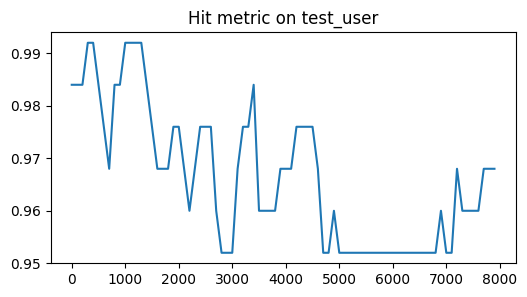

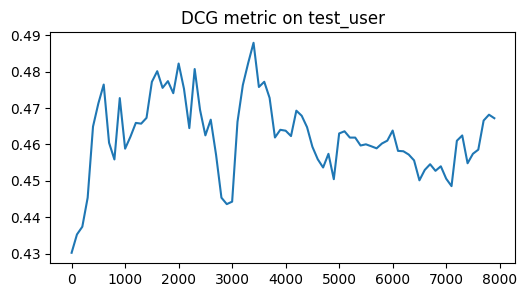

In [11]:
plot_hit(hits, 100, 'test_user')
plot_dcg(dcgs, 100, 'test_user')

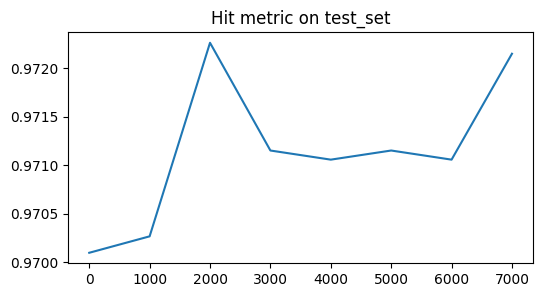

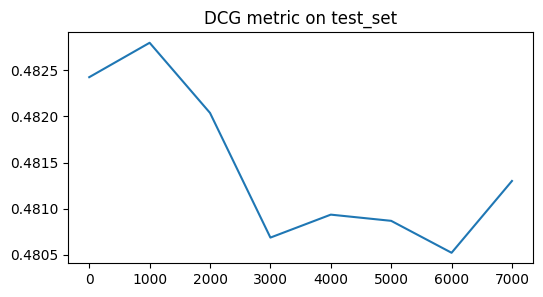

In [12]:
plot_hit(hits_all, 1000, 'test_set')
plot_dcg(dcgs_all, 1000, 'test_set')

#### Evaluation on test set

In [ ]:
with open(params['log_w_ou_dir'] + 'memory.pickle', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
state_rep = State_Representation(num_of_users, num_of_books, params['embedding_dim'], params['hidden_dim'])
policy = Actor(params['embedding_dim'], params['hidden_dim'])
state_rep.load_state_dict(torch.load(params['log_w_ou_dir'] + 'best_state_repr.pth'))
policy.load_state_dict(torch.load(params['log_w_ou_dir'] + 'best_policy_net.pth'))

<All keys matched successfully>

In [ ]:
hit, dcg = evaluation(policy, state_rep, memory, full_loader)
print('hit rate: ', hit, 'dcg: ', dcg)

hit rate:  0.9684250117536436 dcg:  0.48148500477136663


#### Inference

In [ ]:
random_user = test_data['user'].sample().iloc[0]
random_user

107

In [ ]:
temp_test_data = test_data[test_data.user == random_user]
temp = pd.merge(temp_test_data, filtered_df, on=['user', 'book'])
temp

,user,book,isbn,title,author,user_id,rating,best_seller
0,107,1341,345309014,Second Foundation (Foundation Novels (Paperback)),Isaac Asimov,254206,9.0,False
1,107,2933,425173534,Ssn,Tom Clancy,254206,9.0,True
2,107,3897,441516645,Glory Lane,Alan Dean Foster,254206,10.0,True
3,107,6824,451151224,The Running Man,Stephen King,254206,9.0,True
4,107,7131,374184232,The Laws of Our Fathers,Scott Turow,254206,9.0,False
5,107,10273,395489334,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,254206,10.0,True
6,107,11569,671653741,SIXTH COLUMN,Robert A. Heinlein,254206,10.0,True
7,107,15090,345288319,The Empire Strikes Back,Donald F. Glut,254206,9.0,False
8,107,15341,345338200,The Caves of Steel,Isaac Asimov,254206,10.0,True
9,107,15358,441218911,Expanded Universe,Robert Heinlein,254206,10.0,False


In [ ]:
recommendations = []

for model, state_representation in zip([policy], [state_rep]):
    env = Environment(test_matrix)
    user, memory = env.reset(random_user)

    # give 2 books that the user has rated in the past
    user, memory, reward, _ = env.step(torch.tensor([6824]))
    user, memory, reward, _ = env.step(torch.tensor([15341]))

    # get next 3 recommendations based on the two books above
    recs = []
    for i in range(3):
        action_emb = model(state_representation(user, memory))
        action = model.get_action(
            user,
            torch.tensor(env.memory[user.detach().cpu().numpy().astype(int), :]),
            state_representation,
            action_emb,
            torch.tensor([item for item in env.available_books if item not in env.viewed_books]).long()
        )
        user, memory, reward, _ = env.step(action)
        recs.append(action)

    recommendations.append(recs)

In [ ]:
recos = [r.item() for r in recommendations[0]]
recos

[23555, 26263, 27268]

In [ ]:
recommended_books = filtered_df[filtered_df.book.isin(recos)][['title', 'author', 'best_seller']].drop_duplicates()
recommended_books

,title,author,best_seller
301919,Reading the Tarot,Leo Louis Martello,True
323999,"Baby Love (Harlequin Temptation, No 352)",Binnie Syril,False
333473,Women on Men,Marlene Rimler,True
